# Numerische Lösung von Anfangswertproblemen

In [74]:
from math import *
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp

import numpy as np
import matplotlib.pyplot as plt

## Einführung

Beispiel: Gesucht ist eine Funktion $y: \mathbb{R} \to \mathbb{R}$ für die gilt:

$$y'(x) = 2 x \cdot y(x), \quad y(0) = 1.$$

Für jedes $x$ soll also die Ableitung $y'(x)$  gleich $2$ mal dem Funktionswert $y(x)$ sein. Gleichzeitig ist vorgegeben, dass $y$ an der Stelle $x=0$ den Wert $y(0) = 1$  annimmt. Wie sich durch Einsetzen leicht überprüfen lässt, löst die Funktion

$$y(x) = \exp(x^2)$$

diese Aufgabe. 

Es sind also

* eine Differentialgleichung (ordinary differential equation), die eine Beziehung zwischen $y'(x)$ und $x$ sowie $y(x)$ herstellt sowie

* Anfangswerte $x_0$ und $y_0$ für die $y(x_0) = y_0$ gelten soll

gegeben. Gesucht ist eine Funktion, die beide Bedingungen erfüllt. Eine solche Aufgabenstellung heißt Anfangswertproblem (initial value problem). 

Dass es im Beispiel gelingt, eine exakte Lösung zu finden ist nicht die Regel. Man wird daher auf numerische Lösungsverfahren zurückgreifen müssen.

Anmerkungen:
 
* Die Lösung solcher Anfangswertprobleme ist von großer praktischer Bedeutung (Wettervorhersage, Berechnung von Schwingungen, Ausbreitung von Infektionskrankheiten und vieles mehr)

* Es existieren eine Vielzahl verschiedener Lösungsverfahren mit einer umfangreichen mathematischen Theorie (zum Beispiel das [Standardwerk](https://www.degruyter.com/document/doi/10.1515/9783110316360/html?lang=de) von Deuflhard und Bornemann)

* Wir kratzen hier nur ein bisschen an der Oberfläche


## Numerische Lösung bei einer unbekannten Funktion

### Schreibweise: Funktion der Differentialgleichung

Wir beginnen damit, eine sehr hilfreiche Schreibweise einzuführen. Hierzu machen wir uns klar, dass die Differentialgleichung im Beispiel oben auch als Vorschrift gelesen werden kann, mit deren Hilfe wir die Ableitung $y'(x)$ berechnen können, wenn $x$ und $y(x)$ gegeben sind. Ohne die Lösungsfunktion zu kennen, können wir mithilfe der Anfangswerte $x_0 = 0$ und $y_0 = 1$ sofort angeben, dass

$$
y'(0) = 2 \cdot 0 \cdot 1 = 0
$$

gelten muss. Die Ableitung $y'(0)$ hängt also nur von den zwei Zahlen $x=0$ und $y(0) = 1$ ab. Den Zusammenhang können wir mithilfe der Funktion $F: \mathbb{R}^2 \to \mathbb{R}$ mit

$$
F(x, y) = 2xy
$$

zum Ausdruck bringen. Unsere Differentialgleichung können wir damit in der Form

$$
y'(x) = F(x, y(x)) = 2x \cdot y(x)
$$

aufschreiben. 

Wir sehen: Eine Differentialgleichung lässt sich in einer Funktion $F$ ausdrücken, die zwei Zahlen $x, y$ eine neue Zahl $F(x, y)$ zuordnet. Wir nennen $F$ die Funktion der Differentialgleichung.

Wir lösen das Anfangswertproblem nun numerisch mit einem sehr rudimentären Verfahren und mit einer Python-Funktion. 

Hierzu benötigen wir die Funktion der DGL

In [75]:
def F(x, y): 
    return 2 * x * y

und die exakte Lösung zum Vergleich

In [76]:
xr = np.linspace(0, 1, 20)
yr = np.exp(xr**2)

### Euler-Verfahren

Ein sehr einfaches numerisches Verfahren zur Lösung von Anfangswertproblemen ist das eulersche Polygonzugverfahren (auch: Euler-Vorwärts), das ausgehend von den Anfangswerten $x_0, y_0$ und einer Schrittweite $h$ die Näherungsösung nach dem Schema

$$
x_{n+1} = x_n + h, \quad y_{n+1} = y_n + h \cdot F(x_n, y_n)
$$

berechnet. Hier die Umsetzung in Python:

In [77]:
def euler(F, I, y0, h):
    n = int((I[1] - I[0]) / h + 1)
    x = I[0] + np.arange(n) * h
    y = np.zeros(n)

    y[0] = y0
    for i in range(0, n - 1):
        y[i + 1] = y[i] + h * F(x[i], y[i])

    return x, y

Damit bestimmen wir die Näherungslösungen für zwei verschiedene Schrittweiten

In [78]:
xe1, ye1 = euler(F, [0, 1], 1, 0.2)
xe2, ye2 = euler(F, [0, 1], 1, 0.02)

und plotten die Ergebnisse

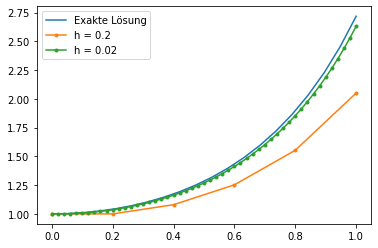

In [79]:
plt.plot(xr, yr, label='Exakte Lösung')
plt.plot(xe1, ye1, '.-', label='h = 0.2')
plt.plot(xe2, ye2, '.-', label='h = 0.02')
plt.legend();

Man sieht, dass die Qualität der Näherung stark von der Schrittweite  abhängt.

### Runge-Kutta-Verfahren in scipy

In dem Python-Paket scipy gibt es die Funktion `solve_ivp` (oben importiert), die eine einheitliche Schnittstelle zu verschiedenen numerischen Verfahren darstellt. Standardmäßig wird eine Runge-Kutta-Verfahren mit automatischer Schrittweitensteuerung verwendet. 

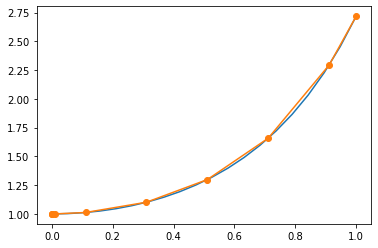

In [80]:
# Näherungslösung
sol = solve_ivp(F, [0, 1], [1], max_step=0.2)

# Plot
plt.plot(xr, yr)
plt.plot(sol.t, sol.y[0], 'o-');

Damit das Verfahren hier keine zu großen Schrittweiten wählt, wird mit `max_step=0.2` der Wert von $h$ nach oben begrenzt.

## Systeme von Differentialgleichungen

In der Praxis gibt es häufig mit Aufgaben, die auf Systeme von Differentialgleichungen führen. Ein Beispiel ist das System

$$
\begin{array}{rcl}
  \dot y_1(t) &=& a \cdot (y_2(t) - y_1(t))\\
  \dot y_2(t) &=& y_1(t) \cdot (b - y_3(t)) - y_2(t)\\
  \dot y_3(t) &=& y_1(t) \cdot y_2(t) - c \cdot y_3(t)
\end{array}
$$

in dem die Ableitungen von drei Funktionen jeweils von den Funktionswerten aller Funktionen abhängen. Dabei sind $a, b, c$ vorgegebene Zahlenwerte. In diesem Fall ordnet die Abbildung $\mathbf{F}: \mathbb{R} \times \mathbb{R}^3 \to \mathbb{R}^3$ der Zeit $t$ und den drei Funktionswerten $y_1(t), y_2(t), y_3(t)$ die zeitlichen Ableitungen $\dot y_1(t), \dot y_2(t), \dot y_3(t)$ zu. Wir fassen das in einem Vektor zusammen und erhalten die Schreibweise

$$
\mathbf{F}(t, \mathbf{y}) =
\left(
\begin{array}{c}
a \cdot (y_2 - y_1) \\
y_1 \cdot (b - y_3) - y_2 \\
y_1 \cdot y_2 - c \cdot y_3
\end{array}
\right),
$$

bei der wir uns nicht davon irritieren lassen, dass $t$ gar nicht rechts vom Gleichheitszeichen auftaucht. In diesem Beispiel ist der Funktionswert unabhängig von $t$ (man sagt, das System ist autonom), im Allgemeinen ist das jedoch nicht der Fall.
Damit können wir das Anfangswertproblem für gegebene Werte $a, b, c$ und eine Anfangsbedingung $t_0$ und $\mathbf{y}_0$ näherungsweise lösen.

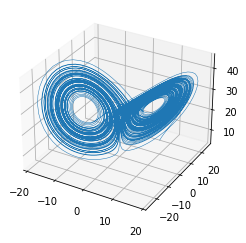

In [81]:
# Funktion der DGL
def F(t, y):
    return np.array([
        10 * (y[1] - y[0]),
        y[0] * (28 - y[2]) - y[1],
        y[0] * y[1] - 8 / 3 * y[2]
    ])

# Anfangswert
y0 = [10, 10, 10]

# Anfangswertproblem lösen
sol = solve_ivp(F, [0, 100], y0, max_step=0.01)

# Plotten
ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2], lw=0.5);

Anmerkung: Dieses Beispiel ist die so genannte Lorenzgleichung, die eng mit dem Schlagwort des [Schmetterlingseffekts](https://de.wikipedia.org/wiki/Schmetterlingseffekt) verbunden ist.

## Steife Differentialgleichungen

Als Beispiel betrachten wir den Van der Pol Oszillator (ein Problem aus der Elektrotechnik) der auf das Anfangswertproblem

$$
  \begin{array}{rcl}
    \dot y_1(t) & = & y_2(t) \\[1ex]
    \dot y_2(t) & = & 1000 \cdot (1-y_1(t)^2) \cdot y_2(t) - y_1(t)
  \end{array}
\quad \text{und} \quad
\mathbf{y}(0) = 
\left(\begin{array}{c}2\\0\end{array}\right)
$$

führt.

In [82]:
# Funktion der DGL
def F(t, y):
    return np.array([
        y[1],
        1000 * (1 - y[0]**2) * y[1] - y[0]
    ])

# Anfangswert
y0 = [2, 0]

Hier die Lösung mit dem Runge-Kutta-Verfahren:

N = 1686888


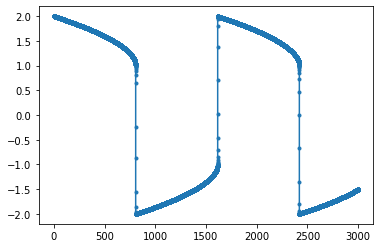

In [83]:
sol = solve_ivp(F, [0, 3000], y0)
print('N =', len(sol.t))
plt.plot(sol.t, sol.y[0], '.-');

Offensichtlich braucht das Lösungsverfahren recht lange (über zwei Minuten) da eine sehr große Anzahl von Zeitschritten benötigt wird.

Wir haben es hier mit einer 'steifen' Differentialgleichung zu tun, für die das explizite Runge-Kutta-Verfahren nicht effizient ist. Hier funktioniert eine Methode, die auch Funktionswerte am Ende des Zeitschritts verwendet (Backward Differentiation Formula - BDF) besser:

N = 537


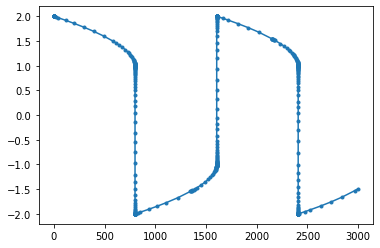

In [84]:
sol = solve_ivp(F, [0, 3000], y0, method='BDF')
print('N =', len(sol.t))
plt.plot(sol.t, sol.y[0], '.-');

Der Unterschied in Rechenzeit und der Anzahl der benötigten Schritte ist sehr deutlich!

Anmerkungen:

* Der Begriff 'steife Differentialgleichung' wird in der Literatur nicht einheitlich verwendet. Vereinfacht kann man sagen, dass eine DGL steif ist, wenn explizite Verfahren nicht gut funktionieren

* Steife DGLn lassen sich häufig mit impliziten Verfahren (zum Beispiel BDF) besser lösen. Bei impliziten Verfahren steht in der Iterationsvorschrift das Ergebnis am Ende des Zeitschritts auch rechts vom Gleichheitszeichen, weshalb ein i.Allg. nichtlineares Gleichungssystem gelöst werden muss.

## Differentialgleichungen mit Massenmatrix

Besitzt das System von Differentialgleichungen die Form

$$
\mathbf{M} \dot{\mathbf{y}}(t) = \mathbf{F}(t, \mathbf{y}(t))
$$

dann wird die Matrix $\mathbf{M}$ Massenmatrix genannt. Hierzu ein konkretes Beispiel, das den Temperaturausgleich zwischen zwei Körpern unterschiedlicher Anfangstemperatur beschreibt:

$$
\left(
\begin{array}{cc}
3000 & 0 \\ 
0 & 3000
\end{array}
\right)
\left(
\begin{array}{c}
\dot \theta_1 \\
\dot \theta_2
\end{array}
\right)
=
-
\left(
\begin{array}{rr}
1 & -1 \\ 
-1 & 1
\end{array}
\right)
\left(
\begin{array}{c}
\theta_1 \\
\theta_2
\end{array}
\right)
\quad \text{und} \quad
\theta(0) = 
\left(
\begin{array}{c}
10 \\ 0
\end{array}
\right)
$$

Hier die beiden Matrizen in Python

In [85]:
M = np.array([[3000, 0], [0, 3000]])
K = np.array([[1, -1], [-1, 1]])

Für die Funktion der DGL multiplizieren wir die Gleichung von links mit $\mathbf{M}^{-1}$ durch und erhalten damit

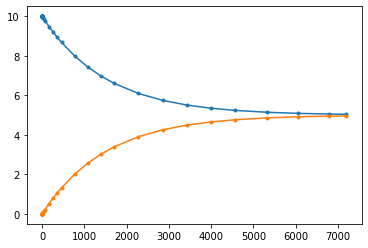

In [86]:
# Inverse von M multipliziert mit K
invMK = np.linalg.inv(M) @ K

# Funktion der DGL
def F(t, theta):
    return -invMK @ theta

# Numerische Lösung
sol = solve_ivp(F, [0, 2 * 3600], [10, 0], method='BDF', jac=-invMK)

# Plot
plt.plot(sol.t, sol.y[0], '.-')
plt.plot(sol.t, sol.y[1], '.-');

Dabei können wir es dem Verfahren einfacher machen, wenn wir die Jacobi-Matrix der Funktion der DGL mit übergeben. 